# Support Vector Machines

In [1]:
# Import
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.svm import SVC
import seaborn as sns; sns.set()


In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Wir als Klassifikatoren 2.0

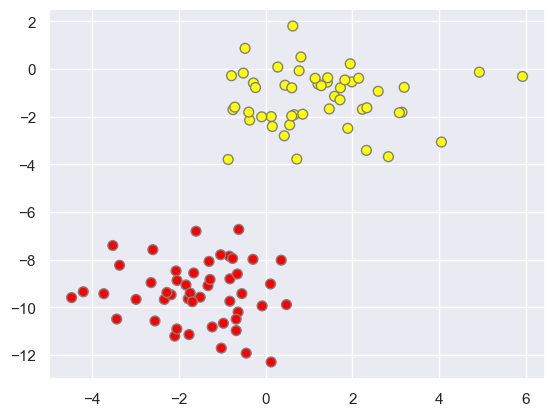

In [3]:
X, y = make_blobs(n_samples=100, centers=2, random_state=2,
                 cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='gray');

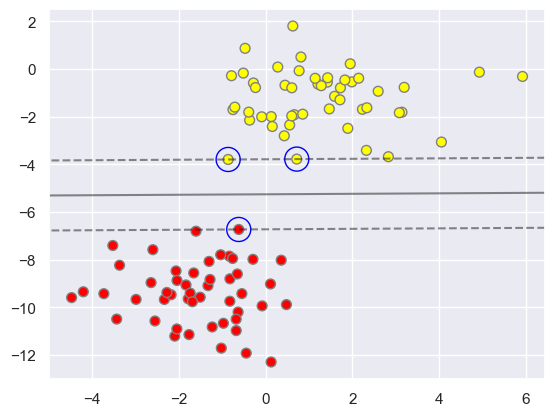

In [4]:
fig, axi = plt.subplots(1, 1)

model = SVC(kernel='linear').fit(X, y)
axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='gray')
plot_svc_decision_function(model, axi)
axi.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none', edgecolors='blue');
#axi.set_title('C = {0:.1f}'.format(C), size=14)

In [5]:
model.support_vectors_

array([[-0.6183571 , -6.73082575],
       [ 0.71935249, -3.77708686],
       [-0.86275998, -3.79273447]])

## Non-linearly separable Problems

In [6]:
from sklearn.svm import SVC # "Support vector classifier"

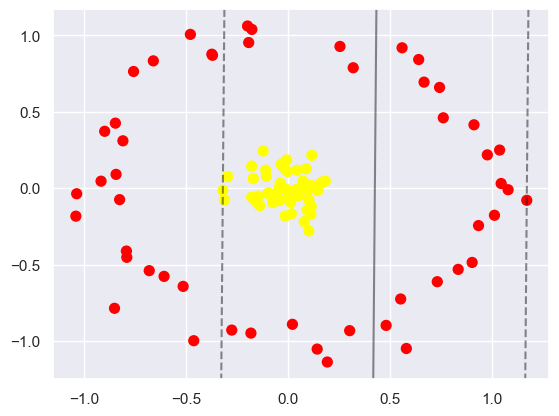

In [7]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [8]:
r = np.exp(-(X ** 2).sum(axis=1))

In [9]:
X[:5]

array([[-6.21567673e-04, -6.04950577e-02],
       [-1.78218068e-01,  1.43866382e-01],
       [-3.70204930e-01,  8.69043408e-01],
       [ 6.39165933e-01,  8.41434717e-01],
       [-1.92841468e-01,  9.52420926e-01]])

In [10]:
# [x_1^2 x_2^2]
(X ** 2)[:5]

array([[3.86346372e-07, 3.65965201e-03],
       [3.17616797e-02, 2.06975358e-02],
       [1.37051690e-01, 7.55236444e-01],
       [4.08533090e-01, 7.08012383e-01],
       [3.71878317e-02, 9.07105620e-01]])

In [11]:
# x_1^2 + x_2^2
(X ** 2)[:5].sum(axis=1)

array([0.00366004, 0.05245922, 0.89228813, 1.11654547, 0.94429345])

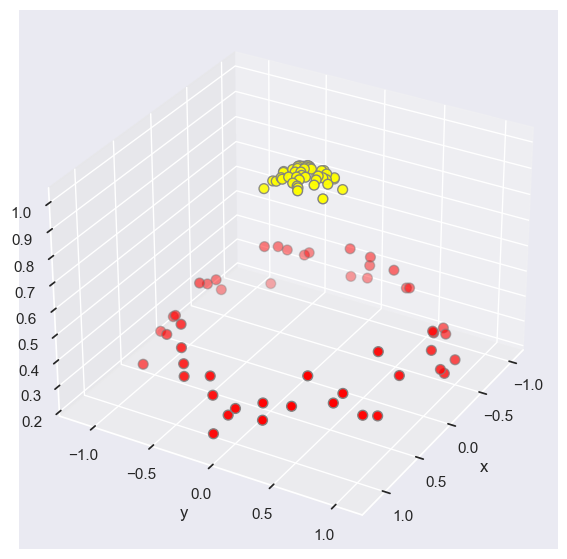

In [12]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn', edgecolors='gray')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plt.figure(figsize=(10, 7))
plot_3D()

In [13]:
np.concatenate((X, r.reshape(-1, 1)), axis=1)

array([[-6.21567673e-04, -6.04950577e-02,  9.96346651e-01],
       [-1.78218068e-01,  1.43866382e-01,  9.48893020e-01],
       [-3.70204930e-01,  8.69043408e-01,  4.09717191e-01],
       [ 6.39165933e-01,  8.41434717e-01,  3.27408886e-01],
       [-1.92841468e-01,  9.52420926e-01,  3.88954289e-01],
       [ 7.90942267e-02, -2.19242174e-01,  9.47126109e-01],
       [ 1.65882716e-02, -1.66912064e-01,  9.72257290e-01],
       [ 4.26309666e-02,  1.17246116e-01,  9.84556443e-01],
       [-8.97731903e-01,  3.71916256e-01,  3.88973418e-01],
       [-1.82013669e-01, -9.47921933e-01,  3.93889460e-01],
       [ 1.00995391e+00, -1.77096365e-01,  3.49458658e-01],
       [-9.53053756e-02, -3.11842342e-02,  9.89994817e-01],
       [ 1.91914359e-01, -1.13694648e+00,  2.64615246e-01],
       [-1.03879460e+00, -1.83035933e-01,  3.28704413e-01],
       [ 7.26679910e-02,  4.69665365e-02,  9.92541462e-01],
       [-8.42025364e-01,  9.03504264e-02,  4.88131758e-01],
       [ 1.46364419e-01, -1.51403720e-02

### SVM: Kernel-Trick

In [14]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

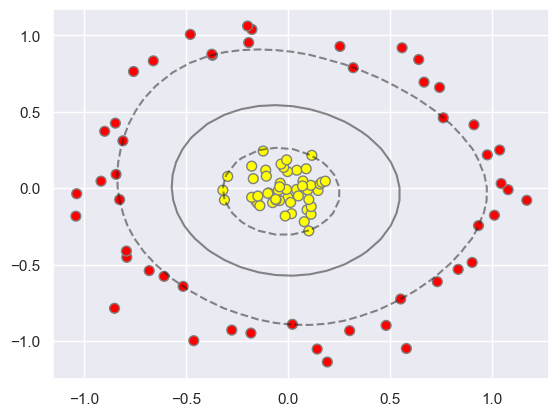

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='gray')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### SVM: Hard- und Soft-Margin

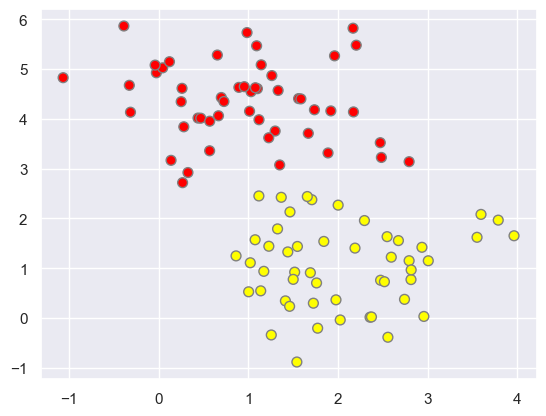

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='gray');

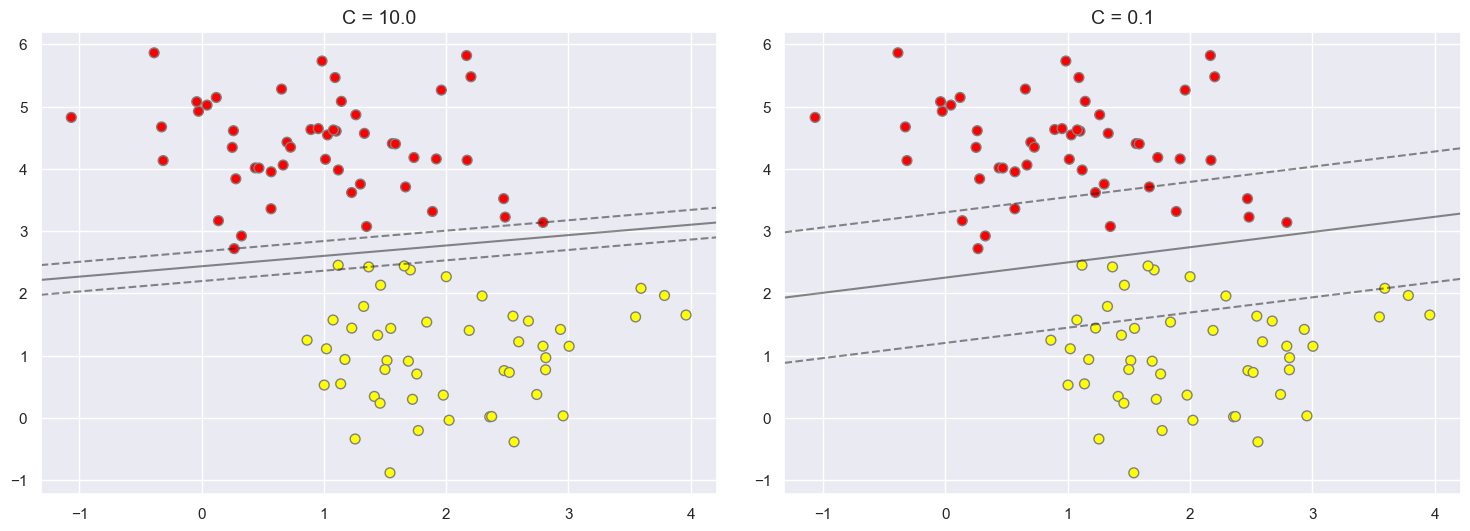

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='gray')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## SVR: Support Vector Regression

### Linear

In [18]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [19]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [20]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

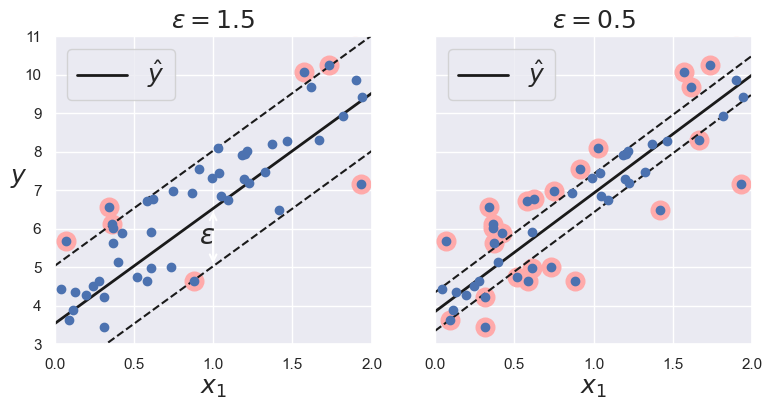

In [21]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

### Non-linear

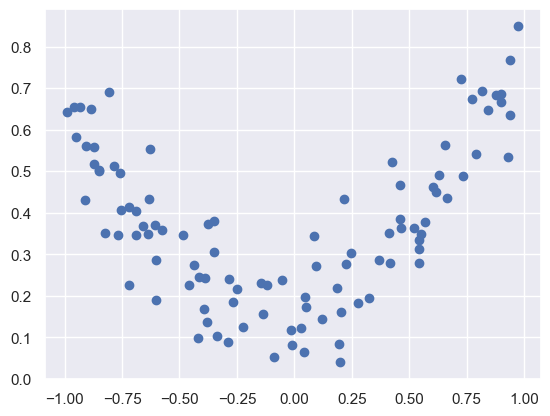

In [22]:
# Some data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

# Show
plt.scatter(X, y);

In [23]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [24]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

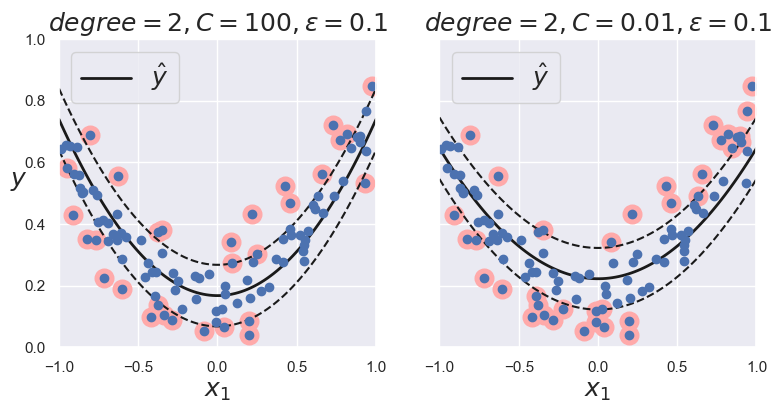

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

In [26]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="rbf", C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100)

In [27]:
from sklearn.svm import SVR

svm_reg1 = SVR(kernel="rbf", C=100, epsilon=0.1)
svm_reg2 = SVR(kernel="rbf",  C=0.01, epsilon=0.1)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

SVR(C=0.01)

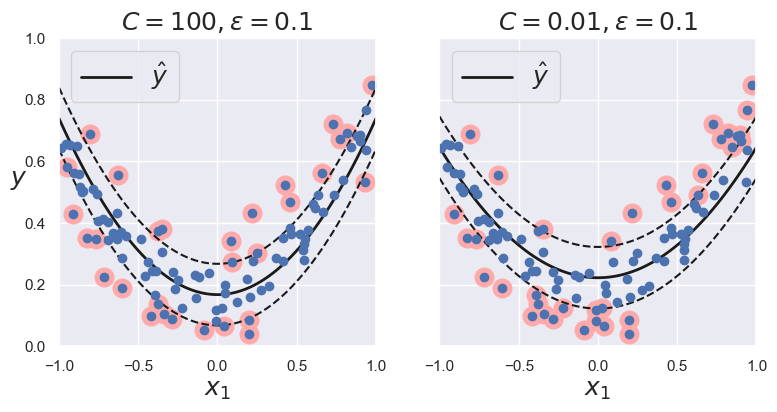

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$C={}, \epsilon = {}$".format(svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$C={}, \epsilon = {}$".format(svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()